In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Latex

In [ ]:
def fouri(inputimg):
  return np.fft.fftshift(np.fft.fft2(inputimg))

def plot_imgft(inputimg, wind, n):
  window = wind(n**2)
  Zft = np.fft.fft2(fouri(inputimg)*window)
  fig, axs = plt.subplots(1, 4, figsize=(9, 3))
  ##
  axs[0].matshow(np.abs(inputimg), cmap="gray", origin="lower")
  axs[0].set_title("Original")
  ##
  axs[1].matshow(np.abs(window), cmap="gray", origin="lower")
  axs[1].set_title(r"Window, $r = $" + str(n))
  ##
  axs[2].imshow(np.abs(Zft), cmap="gray", origin="lower")
  axs[2].set_title("FT Amplitude, $r = $"+ str(n))
  ##
  axs[3].imshow(np.log(1 + np.abs(Zft)), cmap="gray", origin="lower")
  axs[3].set_title("FT Log Amplitude, $r = $"+ str(n))

  ## Cosmetic
  for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

  fig.tight_layout()

  return fig, axs

def plot_imgft2(inputimg, wind, n1, n2):
  window = wind(n1, n2)
  Zft = np.fft.fft2(fouri(inputimg)*window)
  fig, axs = plt.subplots(1, 4, figsize=(9, 3))
  ##
  axs[0].matshow(np.abs(inputimg), cmap="gray", origin="lower")
  axs[0].set_title("Original")
  ##
  axs[1].matshow(np.abs(window), cmap="gray", origin="lower")
  axs[1].set_title("Window \n $r_1 = $" + str(n1) + r", $r_2 = $" + str(n2))
  ##
  axs[2].imshow(np.abs(Zft), cmap="gray", origin="lower")
  axs[2].set_title("FT Amplitude \n $r_1 = $" + str(n1) + r", $r_2 = $" + str(n2))
  ##
  axs[3].imshow(np.log(1 + np.abs(Zft)), cmap="gray", origin="lower")
  axs[3].set_title("FT Log Amplitude \n $r_1 = $" + str(n1) + r", $r_2 = $" + str(n2))

  ## Cosmetic
  for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

  fig.tight_layout()

  return fig, axs


(<Figure size 900x300 with 4 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'Window, $r = $9'}>,
        <Axes: title={'center': 'FT Amplitude, $r = $9'}>,
        <Axes: title={'center': 'FT Log Amplitude, $r = $9'}>],
       dtype=object))

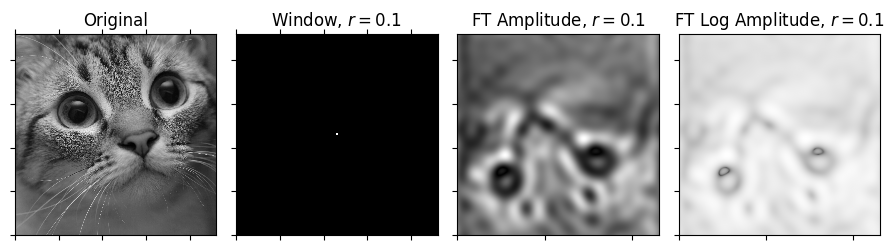

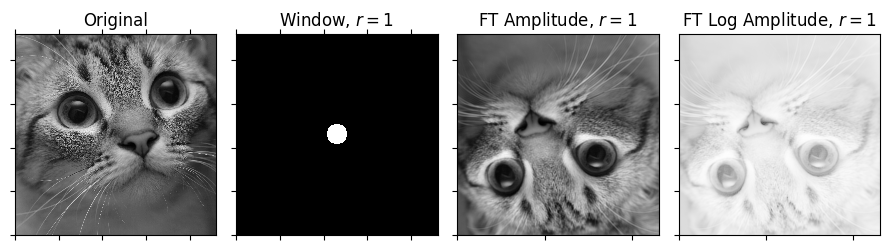

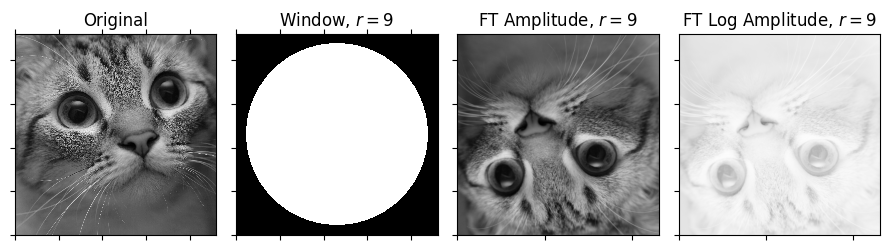

In [ ]:
the_cat = np.load("the_cat.npy")
the_cat = np.flipud(the_cat)

def pinhole(N):
  pos2 = np.linspace(-10, 10, 2304)
  X, Y = np.meshgrid(pos2, pos2)
  Z = X**2 + Y**2
  Z = 1*(Z < N)
  return Z

plot_imgft(the_cat, pinhole, 0.1)
plot_imgft(the_cat, pinhole, 1)
plot_imgft(the_cat, pinhole, 9)

(<Figure size 900x300 with 4 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'Window \n $r_1 = $1, $r_2 = $1.1'}>,
        <Axes: title={'center': 'FT Amplitude \n $r_1 = $1, $r_2 = $1.1'}>,
        <Axes: title={'center': 'FT Log Amplitude \n $r_1 = $1, $r_2 = $1.1'}>],
       dtype=object))

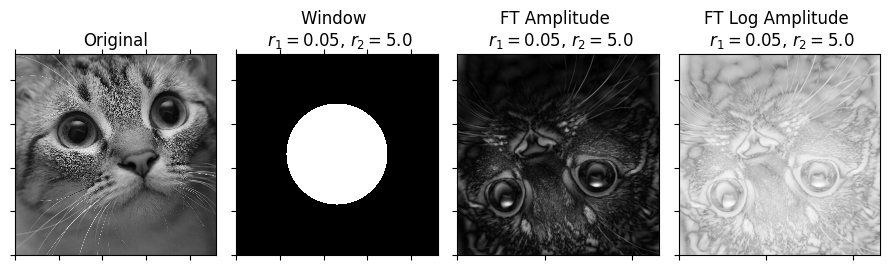

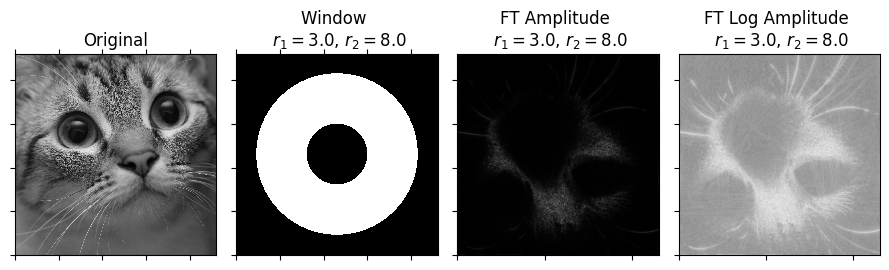

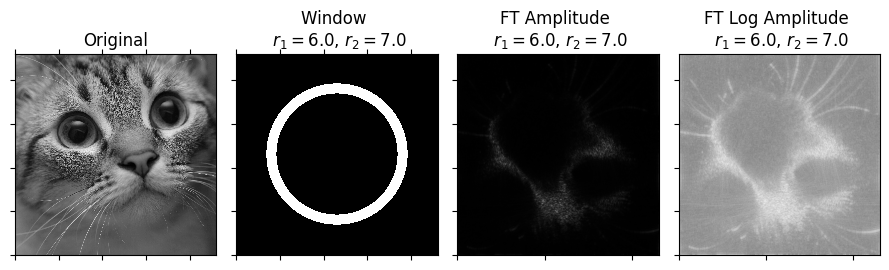

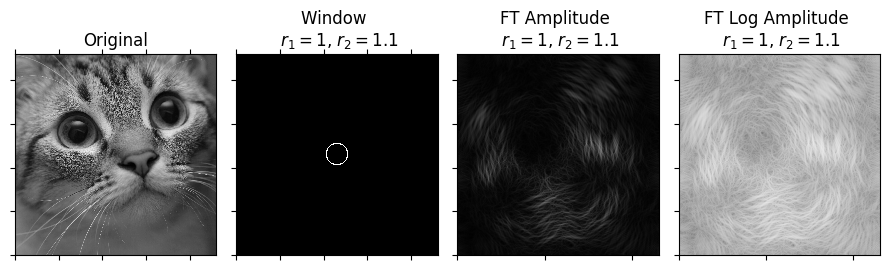

In [ ]:
def torus(n1, n2):
  pos2 = np.linspace(-10, 10, 2304)
  X, Y = np.meshgrid(pos2, pos2)
  Z = X**2 + Y**2
  Z = 1*((Z <= n2**2) & (Z >= n1**2))
  return Z

plot_imgft2(the_cat, torus, 0.05, 5.0)
plot_imgft2(the_cat, torus, 3.0, 8.0)
plot_imgft2(the_cat, torus, 6.0, 7.0)
plot_imgft2(the_cat, torus, 1, 1.1)
